# Recreating part of Fig. 1 from "Cell shape changes indicate a role for extrinsic tensile forces in Drosophila germ-band extension"

In [2]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

# with h5py.File('../../CodePass2/runs/finale.hdf5', 'r') as f:
#     # read the data
#     positions = f['x'][:]
#     properties = f['properties'][:][0]
#     p = f['p'][:]

positions = np.load("../f_poss.npy")
properties = np.load("../f_properties.npy")

positions = positions[:, properties == 1, :]

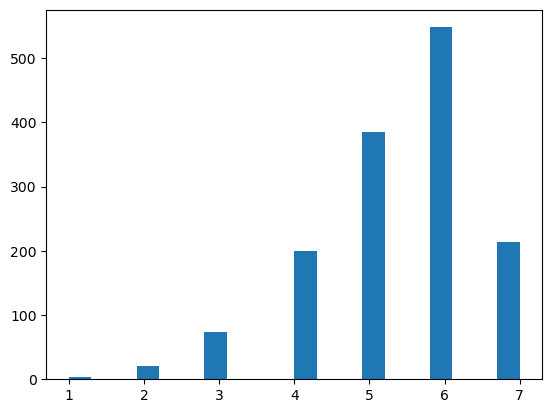

In [3]:
# find  neighbors
def find_neighbors(positions, r):
    neighbors = []
    for i in range(positions.shape[0]):
        dist = np.linalg.norm(positions - positions[i], axis=1)
        neighbors.append(np.where(dist < r)[0])
    return neighbors

neighbors = find_neighbors(positions[0], 2)

plt.hist([len(n) for n in neighbors], bins=20)

plt.show()

In [18]:
np.linspace(0, len(positions)-1, 10)

array([   0.        ,  333.33333333,  666.66666667, 1000.        ,
       1333.33333333, 1666.66666667, 2000.        , 2333.33333333,
       2666.66666667, 3000.        ])

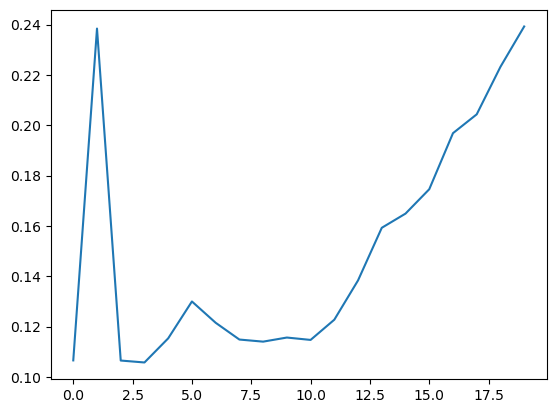

In [25]:


ts = np.linspace(0, len(positions)-1, 50).astype(int)
all_l_width_changes = []
all_phi_width_changes = []

for t_index in range(20, len(ts)):
    t0 = ts[t_index-20]
    t1 = ts[t_index]
    # transform into cylindrical coordinates
    xx_first = positions[t0][:, 0]
    yy_first = positions[t0][:, 1]
    zz_first = positions[t0][:, 2]

    xx_later = positions[t1][:, 0]
    yy_later = positions[t1][:, 1]
    zz_later = positions[t1][:, 2]

    def transform_to_cylindrical(x, y, z):
        l = x
        r = np.sqrt(y**2 + z**2)
        phi = np.arctan2(z, y)
        return l, r, phi



    l_width_changes = []
    phi_width_changes = []

    l, r, phi = transform_to_cylindrical(xx_first, yy_first, zz_first)
    l_later, r_later, phi_later = transform_to_cylindrical(xx_later, yy_later, zz_later)


    for cell, nbs in enumerate(neighbors):
        if len(nbs) < 2:
            continue


        l_width = np.max(l[nbs]) - np.min(l[nbs])
        phi_width = np.max(phi[nbs]) - np.min(phi[nbs])

        l_width_later = np.max(l_later[nbs]) - np.min(l_later[nbs])
        phi_width_later = np.max(phi_later[nbs]) - np.min(phi_later[nbs])

        lw_change = l_width_later - l_width
        l_width_changes.append(lw_change/l_width)
        p_change = phi_width_later - phi_width
        phi_width_changes.append(p_change/phi_width)


    l_width_changes = np.array(l_width_changes)
    phi_width_changes = np.array(phi_width_changes)

    all_l_width_changes.append(l_width_changes)
    all_phi_width_changes.append(phi_width_changes)


all_l_width_changes = np.array(all_l_width_changes)
all_phi_width_changes = np.array(all_phi_width_changes)


y = np.mean(all_l_width_changes, axis=1)[10:]

plt.plot(y)
plt.show()

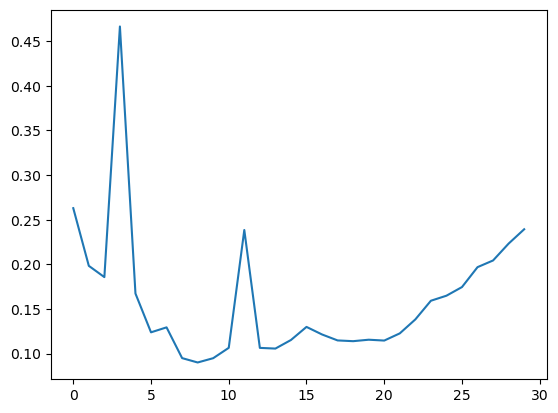

In [26]:
lscale = np.max(positions[0][:, 0]) - np.min(positions[0][:, 0])
phiscale = np.max(positions[0][:, 1]) * np.pi*2

y = np.mean(all_l_width_changes, axis=1)
plt.plot(y)
# y = np.mean(all_phi_width_changes, axis=1)[10:]
# plt.plot(y)


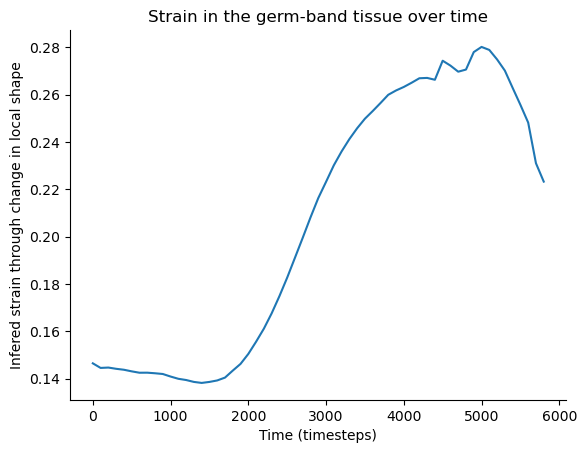

In [79]:
import seaborn as sns
y = np.mean(all_l_width_changes, axis=1)[10:]

smoothed = np.convolve(y, np.ones(12)/12, mode='valid')
sns.lineplot(x=np.arange(len(smoothed))*100, y=smoothed)
sns.despine()

plt.xlabel('Time (timesteps)')

plt.ylabel('Infered strain through change in local shape')

plt.title('Strain in the germ-band tissue over time')
plt.show()


### Bootstrap me?

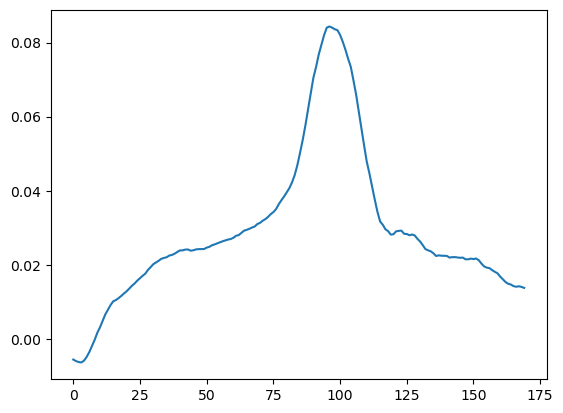

In [51]:
# plot geometric mean


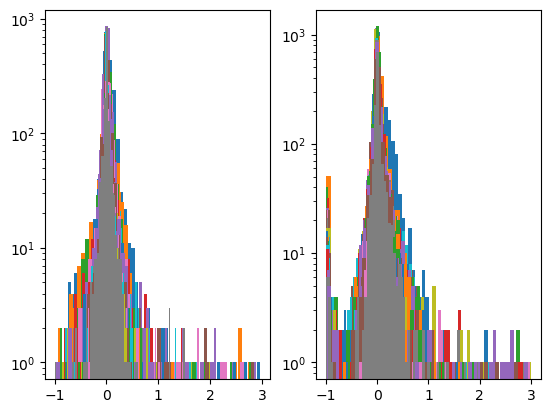

In [7]:
fig, axs = plt.subplots(1, 2)
for l_width_changes, phi_width_changes in zip(all_l_width_changes, all_phi_width_changes):
    axs[0].hist(l_width_changes[l_width_changes<3], bins=50)
    axs[0].set_yscale('log')

    axs[1].hist(phi_width_changes[phi_width_changes<3], bins=50)
    axs[1].set_yscale('log')

plt.show()

In [8]:
# transform into cylindrical coordinates
xx = positions[2000][:, 0]
yy = positions[2000][:, 1]
zz = positions[2000][:, 2]

l = xx
r = np.sqrt(yy**2 + zz**2)
phi = np.arctan2(zz, yy)


for l_width, phi_width in zip(l_width, phi_width):
    print(l_width, phi_width)
    plt.plot(l_width, phi_width, 'o')

TypeError: 'numpy.float32' object is not iterable